In [1]:
from layer import tanh, linear_layer, sigmoid, ReLU, LeakyReLU
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data Generation
def generate_linear(n= 100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return  np.array(inputs), np.array(labels).reshape(n, 1)


def generate_XOR_easy():
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1 *i, 0.1 * i])
        labels.append(0)

        if 0.1 * i == 0.5:
            continue

        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)
    
    return  np.array(inputs), np.array(labels).reshape(21, 1)

In [3]:

def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title("Ground truth", fontsize= 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], "ro")
        else:
            plt.plot(x[i][0], x[i][1], "bo")

    plt.subplot(1, 2, 2)
    plt.title("Predict result", fontsize= 18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], "ro")
        else:
            plt.plot(x[i][0], x[i][1], "bo")
    
    plt.show()

In [4]:
class linear_model:
    def __init__(self, in_features, out_features):
        # hidden layer 1
        self.linear_1 = linear_layer(in_features, 3)
        # hidden layer 2
        self.linear_2 = linear_layer(3, 3)
        # hidden layer 3
        self.linear_3 = linear_layer(3, out_features)
        self.ac_tanh = tanh()
        self.ac_sigmoid  = sigmoid() 
        self.ac_ReLU = ReLU()
        self.ac_LeakyReLu = LeakyReLU()
    
    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):

        x = self.linear_1(x)
        x = self.ac_ReLU(x)

        x = self.linear_2(x)
        x = self.ac_ReLU(x)

        x = self.linear_3(x)
        x = self.ac_sigmoid(x)
        return x
        
    
    def backward(self, x):
        
        grad_a3 = x
        grad_z3 = self.ac_sigmoid.derivative(self.linear_3.z) * grad_a3 
        
        grad_a2 = np.matmul(grad_z3, self.linear_3.weight)
        grad_z2 = self.ac_ReLU.derivative(self.linear_2.z) * grad_a2

        grad_a1 = np.matmul(grad_z2, self.linear_2.weight)
        grad_z1 = self.ac_ReLU.derivative(self.linear_1.z) * grad_a1 

        self.linear_3.weight_grad = np.matmul(self.linear_3.a.T, grad_z3)
        self.linear_3.bias_grad = np.sum(grad_z3, axis= 0)
        
        self.linear_2.weight_grad = np.matmul(self.linear_2.a.T, grad_z2)
        self.linear_2.bias_grad = np.sum(grad_z2, axis= 0)

        self.linear_1.weight_grad = np.matmul(self.linear_1.a.T, grad_z1)
        self.linear_1.bias_grad = np.sum(grad_z1, axis= 0)

    def update(self, lr= 1e-4):
        self.linear_3.update(lr)
        self.linear_2.update(lr)
        self.linear_1.update(lr)

    def grad_zero(self):
        self.linear_3.grad_zero()
        self.linear_2.grad_zero()
        self.linear_1.grad_zero()

In [5]:
def draw_loss(y):
    x = [i for i in range(len(y))]
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth= 2.0)
    ax.set(xlim=(0, len(y)), xticks=np.arange(1, len(y), 10000),  # 設定座標軸
    ylim=(0, 1), yticks=np.arange(0, 2, 0.1))

    plt.show()    # 顯示圖表

In [6]:
def train(model, x, y, config):

    epoch = config["epoch"]
    lr = config["learning_rate"]

    loss = list()
    for i in range(epoch):
        model.grad_zero()
        # prediction
        pred = model(x)
        # MSE loss
        MSE_loss = ((pred - y) ** 2).mean()
        loss.append(MSE_loss)
        if (i + 1) % 5000 == 0:
            print(f"Epoch: {i + 1}, Loss: {MSE_loss}")
        # cal
        grad_y = -2 * (y - pred)
        model.backward(grad_y)
        model.update(lr= lr)

    draw_loss(loss)
    return model

In [7]:
def test(model, x, y):
    pred = model(x)
    loss = ((pred - y) ** 2).mean()
    correct_cnt = 0
    for i, (y_pred, y_true) in enumerate(zip(pred, y)):
        print("Iter{} |  Ground Truth: {:.1f} | Prediction: {:.5f} |".format(i, y_true[0], y_pred[0]))
        if(np.around(y_pred, 0) == y_true):
            correct_cnt += 1

    print("loss={:.8f} accuracy={:.2%}".format(loss, correct_cnt / len(y)))
    show_result(x, y, np.around(pred,0))

In [8]:
# hyperparameter
config = {
    "epoch" : 100000,
    "learning_rate" : 1e-3
}

In [9]:
model1 = linear_model(2, 1) 

Epoch: 5000, Loss: 0.007368292402091441
Epoch: 10000, Loss: 0.003782799500157825
Epoch: 15000, Loss: 0.002279311025761753
Epoch: 20000, Loss: 0.0014946738042793852
Epoch: 25000, Loss: 0.0010457922549189376
Epoch: 30000, Loss: 0.0007711393130490962
Epoch: 35000, Loss: 0.0005943815068033345
Epoch: 40000, Loss: 0.0004733778082405011
Epoch: 45000, Loss: 0.00038744491894874964
Epoch: 50000, Loss: 0.0003243655613975084
Epoch: 55000, Loss: 0.00027670121079464115
Epoch: 60000, Loss: 0.0002397699839490232
Epoch: 65000, Loss: 0.00021052796632696215
Epoch: 70000, Loss: 0.0001869355595859929
Epoch: 75000, Loss: 0.00016758805890555693
Epoch: 80000, Loss: 0.00015149376222737624
Epoch: 85000, Loss: 0.0001379368180410041
Epoch: 90000, Loss: 0.00012638999722810613
Epoch: 95000, Loss: 0.00011645799106869265
Epoch: 100000, Loss: 0.00010783958045097237


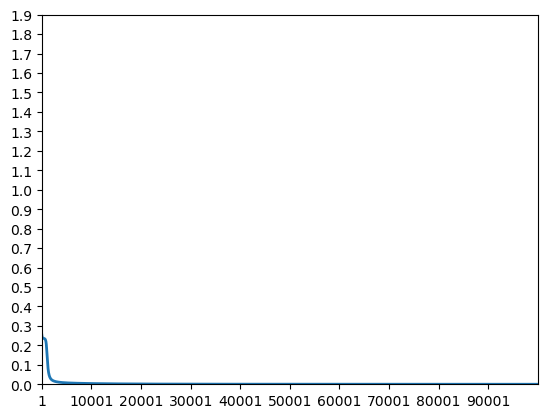

In [10]:
# Training
x, y = generate_linear(n = 100)
model1 = train(model1, x, y, config)

Iter0 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter1 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter2 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter3 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter4 |  Ground Truth: 1.0 | Prediction: 0.99163 |
Iter5 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter6 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter7 |  Ground Truth: 1.0 | Prediction: 0.99163 |
Iter8 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter9 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter10 |  Ground Truth: 1.0 | Prediction: 0.99163 |
Iter11 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter12 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter13 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter14 |  Ground Truth: 1.0 | Prediction: 0.99163 |
Iter15 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter16 |  Ground Truth: 1.0 | Prediction: 0.99163 |
Iter17 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter18 |  Ground Truth: 0.0 | Prediction: 0.00009 |
Iter19 |  Ground Truth

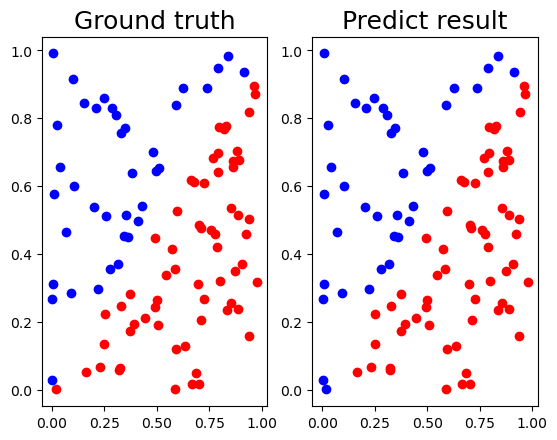

In [11]:
# Testing
x, y = generate_linear(n= 100)
test(model1, x, y)


In [ ]:
class linear_model:
    def __init__(self, in_features, out_features):
        # hidden layer 1
        self.linear_1 = linear_layer(in_features, 2)
        # hidden layer 2
        self.linear_2 = linear_layer(2, 2)
        # hidden layer 3
        self.linear_3 = linear_layer(2, out_features)
        self.ac_tanh = tanh()
    
    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        x = self.linear_1(x)
        x = self.ac_tanh(x)
        x = self.linear_2(x)
        x = self.ac_tanh(x)
        x = self.linear_3(x)
        return x
    
    def backward(self, x):
        
        grad_a3 = x
        grad_z3 = grad_a3
        
        grad_a2 = np.matmul(grad_z3, self.linear_3.weight)
        grad_z2 = self.ac_tanh.derivative(self.linear_2.z) * grad_a2

        grad_a1 = np.matmul(grad_z2, self.linear_2.weight)
        grad_z1 = self.ac_tanh.derivative(self.linear_1.z) * grad_a1 

        self.linear_3.weight_grad = np.matmul(self.linear_3.a.T, grad_z3)
        self.linear_3.bias_grad = np.sum(grad_z3, axis= 0)
        
        self.linear_2.weight_grad = np.matmul(self.linear_2.a.T, grad_z2)
        self.linear_2.bias_grad = np.sum(grad_z2, axis= 0)

        self.linear_1.weight_grad = np.matmul(self.linear_1.a.T, grad_z1)
        self.linear_1.bias_grad = np.sum(grad_z1, axis= 0)

    def update(self, lr= 1e-4):
        self.linear_3.update(lr)
        self.linear_2.update(lr)
        self.linear_1.update(lr)

In [ ]:
model2 = linear_model(2, 1) 

Epoch: 5000, Loss: 0.015068932309349277
Epoch: 10000, Loss: 0.0031098419316401985
Epoch: 15000, Loss: 0.0014483058154950918
Epoch: 20000, Loss: 0.0008896513528730982
Epoch: 25000, Loss: 0.0006248933375941896
Epoch: 30000, Loss: 0.000474539348888884
Epoch: 35000, Loss: 0.00037907878226434947
Epoch: 40000, Loss: 0.00031371643813888153
Epoch: 45000, Loss: 0.0002664600560059995
Epoch: 50000, Loss: 0.00023086407693256408
Epoch: 55000, Loss: 0.00020318024133035006
Epoch: 60000, Loss: 0.00018109149956405877
Epoch: 65000, Loss: 0.00016309390344891884
Epoch: 70000, Loss: 0.00014817156477479074
Epoch: 75000, Loss: 0.00013561511481625566
Epoch: 80000, Loss: 0.0001249151277119952
Epoch: 85000, Loss: 0.00011569687058000323
Epoch: 90000, Loss: 0.00010767889773694568
Epoch: 95000, Loss: 0.0001006459495409688
Epoch: 100000, Loss: 9.443072816739653e-05


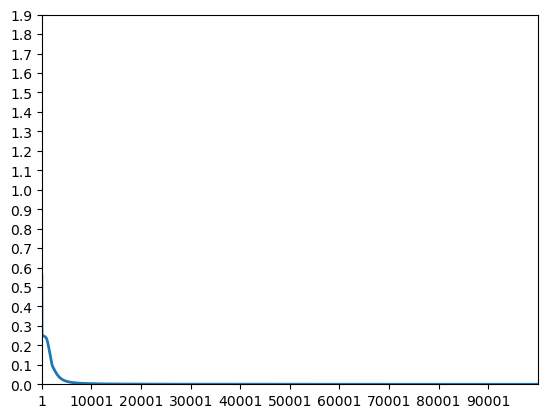

In [ ]:
# Training
x, y = generate_XOR_easy()
model2 = train(model2, x, y, config)

Iter0 |  Ground Truth: 0.0 | Prediction: 0.00039 |
Iter1 |  Ground Truth: 1.0 | Prediction: 0.99594 |
Iter2 |  Ground Truth: 0.0 | Prediction: 0.00029 |
Iter3 |  Ground Truth: 1.0 | Prediction: 0.99506 |
Iter4 |  Ground Truth: 0.0 | Prediction: 0.00021 |
Iter5 |  Ground Truth: 1.0 | Prediction: 0.99727 |
Iter6 |  Ground Truth: 0.0 | Prediction: 0.00016 |
Iter7 |  Ground Truth: 1.0 | Prediction: 1.01524 |
Iter8 |  Ground Truth: 0.0 | Prediction: 0.00013 |
Iter9 |  Ground Truth: 1.0 | Prediction: 0.99586 |
Iter10 |  Ground Truth: 0.0 | Prediction: 0.00012 |
Iter11 |  Ground Truth: 0.0 | Prediction: 0.00013 |
Iter12 |  Ground Truth: 1.0 | Prediction: 0.96300 |
Iter13 |  Ground Truth: 0.0 | Prediction: 0.00016 |
Iter14 |  Ground Truth: 1.0 | Prediction: 1.00631 |
Iter15 |  Ground Truth: 0.0 | Prediction: 0.00021 |
Iter16 |  Ground Truth: 1.0 | Prediction: 1.00922 |
Iter17 |  Ground Truth: 0.0 | Prediction: 0.00029 |
Iter18 |  Ground Truth: 1.0 | Prediction: 1.00970 |
Iter19 |  Ground Truth

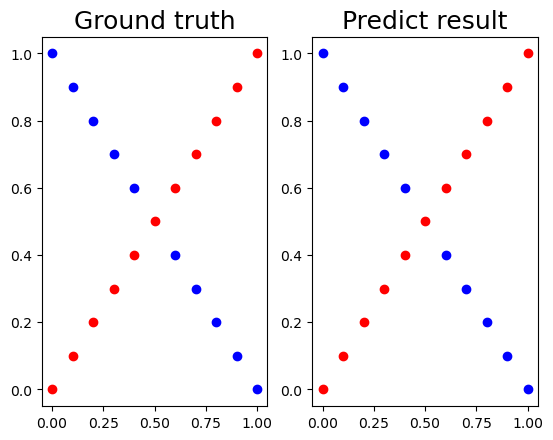

In [ ]:
# Testing
x, y = generate_XOR_easy()
test(model2, x, y)